<a href="https://colab.research.google.com/github/JL-plusUltra/DataScience/blob/main/Image_Classification_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage, misc
import cv2

In [ ]:
i =plt.imread('/content/foosa.jpg')
idog = plt.imread('/content/dog.jpg')
icat = plt.imread('/content/cat.jpg')

In [ ]:
i.shape
print(idog.shape)
print(icat.shape)

(195, 258, 3)
(193, 261, 3)


In [ ]:
from scipy.ndimage import zoom
i = zoom(i, (150/183, 150/275, 3/4))
idog = zoom(idog, (150/195, 150/258, 1))
icat = zoom(icat,(150/193,150/261,1))

In [ ]:
i= i/255
idog = idog/255
icat = icat/255

In [ ]:
print(idog.shape, icat.shape)

(150, 150, 3) (150, 150, 3)


In [ ]:
i = np.expand_dims(i, axis=0)
idog = np.expand_dims(idog, axis=0)
icat = np.expand_dims(icat, axis=0)

In [ ]:
print(icat.shape, idog.shape)

(1, 150, 150, 3) (1, 150, 150, 3)


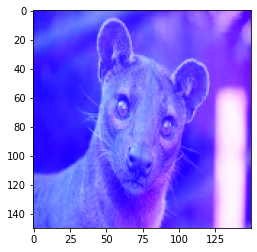

In [ ]:
plt.figure()
plt.imshow(i)

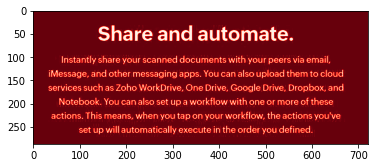

In [ ]:
plt.imshow(i[:,:,0], cmap='Reds')

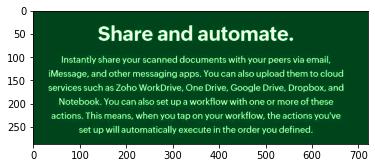

In [ ]:
plt.imshow(i[:,:,0], cmap='Greens')

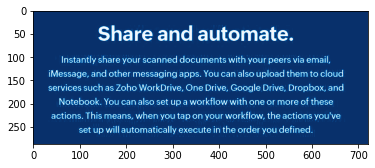

In [ ]:
plt.imshow(i[:,:,0], cmap='Blues')

In [ ]:
type(i)

numpy.ndarray

In [ ]:
i.shape

(287, 721, 3)

In [ ]:
bw =np.mean(i, axis=2)
print(bw.shape)

(287, 721)


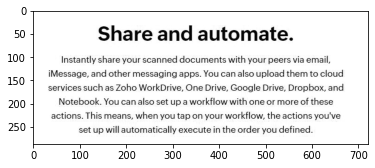

In [ ]:
plt.imshow(bw, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


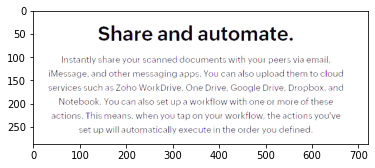

In [ ]:
i_contrast = i**1.3/255
plt.imshow(i_contrast)

In [ ]:
from PIL import Image

In [ ]:
Ip=Image.open('/content/foosa.jpg')

In [ ]:
type(Ip)

PIL.PngImagePlugin.PngImageFile

In [ ]:
irez= Ip.resize((500,500),)

In [ ]:
irez.size

(500, 500)

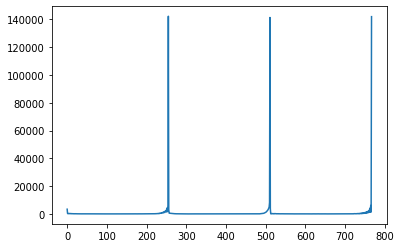

In [ ]:
plt.plot(Ip.histogram())

In [ ]:
def discrete2Dconvolution(image, filter, padding):

  paddedImage = np.pad(image, padding, 'constant')
  filter = np.rot90(filter, 2)
  conv = np.empty(image.shape)
  
  for i in range(paddedImage.shape[0]-filter.shape[0]):
    for j in range(paddedImage.shape[1]-filter.shape[1]):
      conv[i,j]=np.sum((paddedImage[i: i +filter.shape[0], j:j+filter.shape[1]])*filter)
  
  return conv

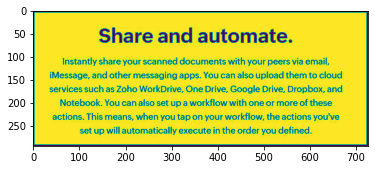

In [ ]:
plt.imshow(np.pad(bw, [3,3],'constant'))

In [ ]:
flterXX=np.array([[0,1,0],[0,1,0],[0,1,0]])
flterNeg=np.array([[-10,1,-1],[-1,1,-1],[-1,1,-1]])
flterREdge=np.array([[-10,0,10],[-10,0,10],[-10,0,10]])

In [ ]:
flterLEdge=np.array([[10,0,-10],[10,0,-10],[10,0,-10]])

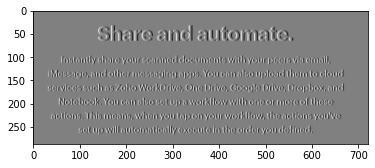

In [ ]:
imCon = discrete2Dconvolution(bw, flterREdge, 1)
plt.imshow(imCon, cmap='gray')


In [ ]:
#imCon = discrete2Dconvolution(bw, flterLEdge, 1)
#plt.imshow(imCon, cmap='Reds')

In [ ]:
def maxPool(image, ksize, stride):
  n=0
  k=0
  vert= int(image.shape[1]/stride)
  hoz = int(image.shape[0]/stride)
  Mxpool= np.empty((hoz, vert))

  for i in range(0,image.shape[0]-stride, stride):
    n=0
    for j in range(0, image.shape[1]-stride, stride):
      Mxpool[k,n]=np.max(image[i:i+ksize, j:j+ksize])
      n+=1
    k+=1
  return Mxpool




In [ ]:
imagePool = maxPool(imCon, 2,2)

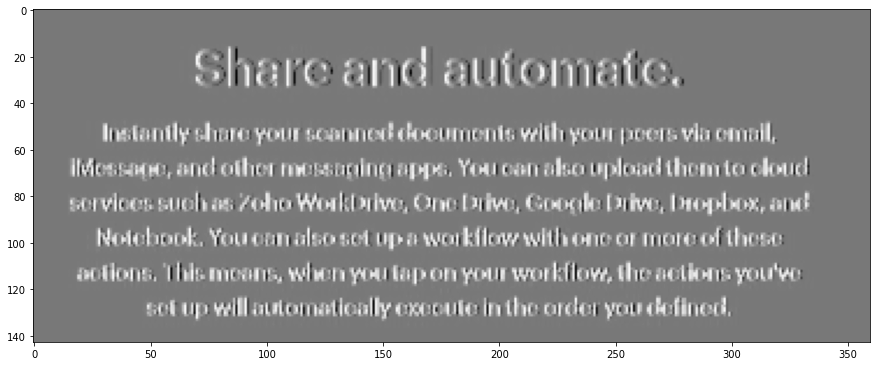

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(imagePool, cmap='gray')

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/cats_and_dogs_filtered.zip

--2021-10-28 17:10:31--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 108.177.121.128, 142.250.103.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M   163MB/s    in 0.4s    

2021-10-28 17:10:31 (163 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os 
import zipfile
local_zip='/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
base_dir='/content/cats_and_dogs_filtered'
train_dir= os.path.join(base_dir,'train')
validation_dir= os.path.join(base_dir,'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [ ]:
train_cat_fnames= os.listdir(train_cats_dir)
train_dog_fnames =os.listdir(train_dogs_dir)

In [ ]:
import matplotlib.image as mpimg

(319, 332, 3)
(149, 200, 3)
(280, 312, 3)
(148, 215, 3)
(359, 480, 3)
(499, 403, 3)
(374, 500, 3)
(499, 495, 3)
(281, 499, 3)
(333, 500, 3)
(374, 500, 3)
(311, 468, 3)
(332, 500, 3)
(300, 399, 3)
(269, 320, 3)
(414, 345, 3)


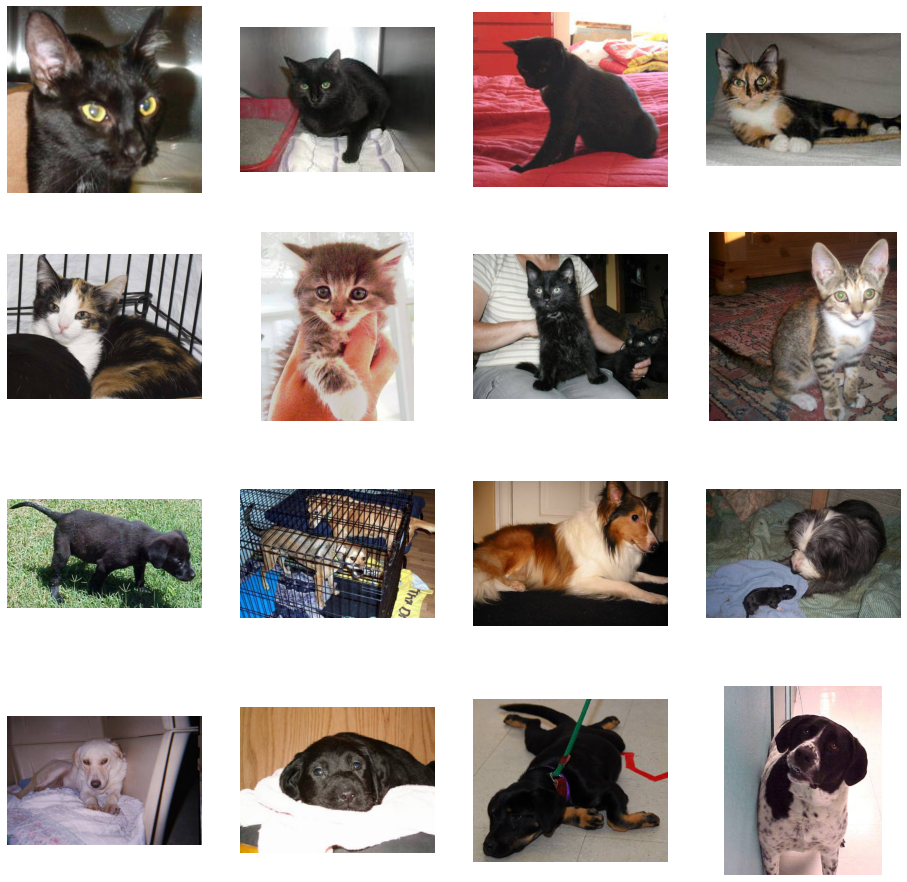

In [ ]:
nrows=4
ncols=4
pic_index=0
fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

pic_index =8
next_cat =[os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog =[os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[pic_index-8:pic_index]]

for i , img_path in enumerate(next_cat+next_dog):
  sp=plt.subplot(nrows,ncols, i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  plt.imshow(img)
  print(img.shape)

In [ ]:
train_cats_dir[:90]

'/content/cats_and_dogs_filtered/train/cats'

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
img_input = layers.Input(shape=(150,150,3))
L = layers.Conv2D(16,3,activation='relu')(img_input)
L = layers.MaxPooling2D(2)(L)

L= layers.Conv2D(32,3,activation='relu')(L)
L= layers.MaxPooling2D(2)(L)

L=layers.Conv2D(64,3, activation='relu')(L)
L=layers.MaxPooling2D(2)(L)

In [ ]:
F=layers.Flatten()(L)
F=layers.Dense(512, activation ='relu')(F)
output =layers.Dense(1, activation ='sigmoid')(F)

In [ ]:
model = Model(img_input, output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Rescaling
train_datagen = ImageDataGenerator(rescale= 1./255)
val_datagen=ImageDataGenerator(rescale =1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode ='binary')
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode ='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50, verbose=2
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 - 41s - loss: 0.7747 - acc: 0.5545 - val_loss: 0.6211 - val_acc: 0.6700
Epoch 2/15
100/100 - 10s - loss: 0.6207 - acc: 0.6690 - val_loss: 0.6903 - val_acc: 0.5830
Epoch 3/15
100/100 - 10s - loss: 0.5591 - acc: 0.7225 - val_loss: 0.5826 - val_acc: 0.6940
Epoch 4/15
100/100 - 10s - loss: 0.5077 - acc: 0.7550 - val_loss: 0.5766 - val_acc: 0.7230
Epoch 5/15
100/100 - 10s - loss: 0.4444 - acc: 0.7960 - val_loss: 0.6890 - val_acc: 0.6770
Epoch 6/15
100/100 - 10s - loss: 0.3724 - acc: 0.8270 - val_loss: 0.5904 - val_acc: 0.7150
Epoch 7/15
100/100 - 10s - loss: 0.2996 - acc: 0.8675 - val_loss: 0.7471 - val_acc: 0.6980
Epoch 8/15
100/100 - 10s - loss: 0.2323 - acc: 0.9000 - val_loss: 0.8329 - val_acc: 0.7000
Epoch 9/15
100/100 - 10s - loss: 0.1665 - acc: 0.9335 - val_loss: 0.9043 - val_acc: 0.7090
Epoch 10/15
100/100 - 10s - loss: 0.1172 - acc: 0.9555 - val_loss: 1.0527 - val_acc: 0.7340
Epoch 11/15
100/100 - 10s - loss: 0.0952 - acc: 0.9740 - val_loss: 1.0509 - val_acc: 0.71

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


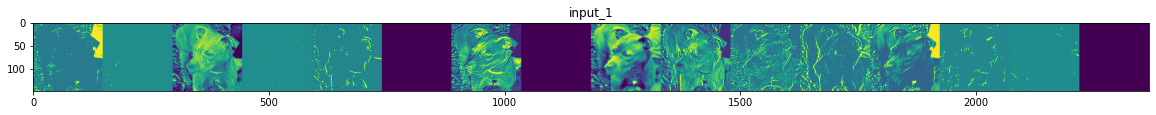

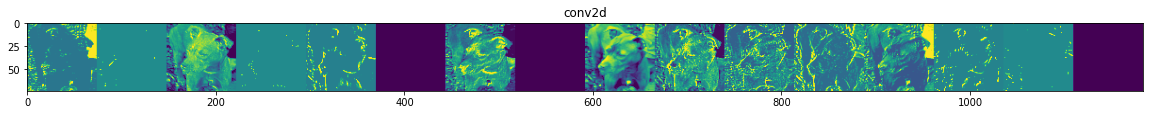

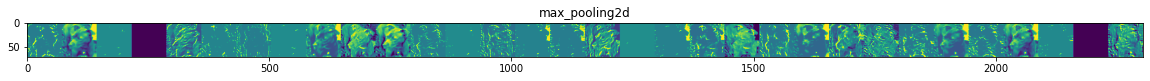

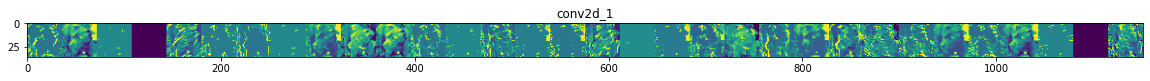

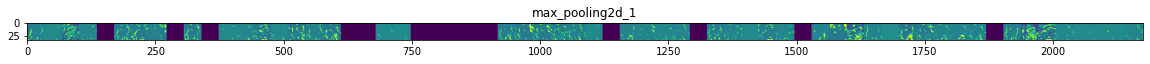

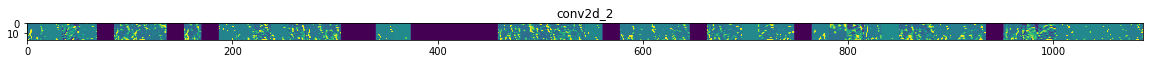

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1)* size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
# Data Augmentation (preprocessing) step of Transfer Learning
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
batch_size=20
img_shape =150

In [ ]:
def plotImages(images_arr):
  fig,axes = plt.subplots(1,5,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()


In [ ]:
#rescale, rotate, sheer, flip (width, height shift)

image_gen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.20,
    height_shift_range = 0.2, 
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip =True,
    fill_mode='nearest'
)

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(
    batch_size=batch_size,
    directory = train_dir,
    shuffle = True,
    target_size=(img_shape, img_shape),
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [ ]:
i_data_gen= image_gen_train.

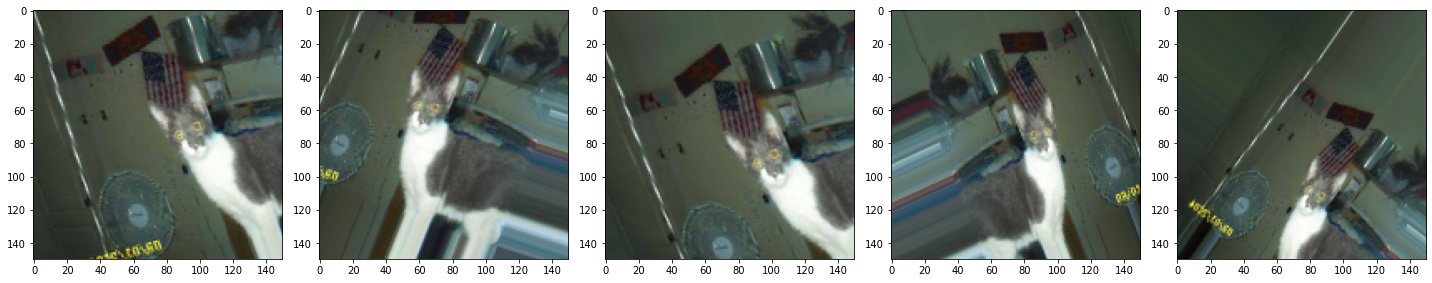

In [ ]:
augmented_img = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_img)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=batch_size,
    directory = validation_dir,
    target_size=(img_shape, img_shape),
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
Input = (150,150,3)

In [ ]:
# step 2 Load a pretrained model

from keras.applications import vgg16
import tensorflow as tf
import keras

In [ ]:
vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=Input)
output = vgg.layers[-1].output
output = tf.keras.layers.Flatten()(output)
vgg_model = Model(vgg.input,output)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg_model.trainable = False

for layer in vgg_model.layers:
  layer.trainable = False


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,InputLayer
from keras.models import Sequential
from keras import optimizers

In [ ]:
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(512, activation='relu',input_dim=Input))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Functional)         (None, 8192)              14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6

In [ ]:
model.compile(
    loss ='binary_crossentropy',
    optimizer = RMSprop(learning_rate=.0005),
    metrics=['binary_accuracy']
)

In [ ]:
history = model.fit_generator(train_data_gen, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=val_data_gen, 
                              validation_steps=50, 
                              callbacks=[callback], 
                              verbose=2)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 - 31s - loss: 0.6691 - binary_accuracy: 0.6510 - val_loss: 0.3976 - val_binary_accuracy: 0.8280
Epoch 2/30
100/100 - 26s - loss: 0.5064 - binary_accuracy: 0.7445 - val_loss: 0.3334 - val_binary_accuracy: 0.8510
Epoch 3/30
100/100 - 26s - loss: 0.4676 - binary_accuracy: 0.7870 - val_loss: 0.3193 - val_binary_accuracy: 0.8670
Epoch 4/30
100/100 - 26s - loss: 0.4360 - binary_accuracy: 0.7960 - val_loss: 0.3572 - val_binary_accuracy: 0.8520
Epoch 5/30
100/100 - 26s - loss: 0.4356 - binary_accuracy: 0.8040 - val_loss: 0.3259 - val_binary_accuracy: 0.8690
Epoch 6/30
100/100 - 26s - loss: 0.4023 - binary_accuracy: 0.8230 - val_loss: 0.3932 - val_binary_accuracy: 0.8290
Epoch 7/30
100/100 - 26s - loss: 0.4068 - binary_accuracy: 0.8190 - val_loss: 0.2868 - val_binary_accuracy: 0.8760
Epoch 8/30
100/100 - 26s - loss: 0.3859 - binary_accuracy: 0.8360 - val_loss: 0.2819 - val_binary_accuracy: 0.8770
Epoch 9/30
100/100 - 26s - loss: 0.3737 - binary_accuracy: 0.8395 - val_loss: 0.

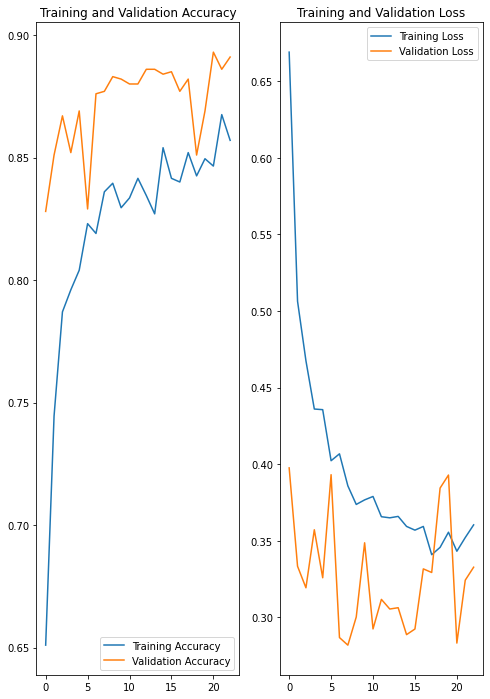

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

#The last epoch step here
epochs_range = range(23)

plt.figure(figsize=(8, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.predict(
    i, verbose=0, steps=None, callbacks=None, max_queue_size=10,
    workers=1, use_multiprocessing=False
)

array([[0.42949483]], dtype=float32)

In [ ]:
model.predict(
    idog, verbose=0, steps=None, callbacks=None, max_queue_size=10,
    workers=1, use_multiprocessing=False
)

array([[1.]], dtype=float32)

In [ ]:
model.predict(
    icat, verbose=0, steps=None, callbacks=None, max_queue_size=10,
    workers=1, use_multiprocessing=False
)

array([[0.]], dtype=float32)